<a href="https://colab.research.google.com/github/cRaeber/Machine-Learning-Final-Project-Raeber-Chris/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8.27)})
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import files
files.upload()

Saving cars.csv to cars.csv


{'cars.csv': b"make,model,transmission,color,miles,year,fuel,engineCapacity,body,drivetrain,price,timeListed\r\nFord,Sierra,mechanical,red,333333,1992,gasoline,2,sedan,rear,1100,16\r\nFord,Mondeo,mechanical,red,250000,1993,gasoline,1.8,universal,front,1100,23\r\nFord,Mondeo,mechanical,red,567834,1996,diesel,1.8,sedan,front,1100,80\r\nFord,Mondeo,mechanical,red,555555,1996,diesel,1.8,universal,front,1100,138\r\nFord,Mondeo,mechanical,red,350000,1997,gasoline,1.6,universal,front,1100,187\r\nMazda,323,mechanical,red,350000,1998,gasoline,1.5,hatchback,front,1100,41\r\nMazda,323,mechanical,red,262000,1998,gasoline,1.8,hatchback,front,1100,42\r\nMazda,Xedos 9,automatic,red,213000,1994,gasoline,2.5,sedan,front,1100,49\r\nMazda,626,mechanical,red,378000,1994,gasoline,1.8,sedan,front,1100,53\r\nMazda,626,mechanical,red,244080,1995,gasoline,1.8,hatchback,front,1100,57\r\nMazda,323,mechanical,red,300000,1997,gasoline,1.5,hatchback,front,1100,64\r\nMazda,626,mechanical,red,400000,1996,gasoline,1.8

In [3]:
df = pd.read_csv('cars.csv')
#move price column to the front for ease of splitting into x and y values
price_move = df.pop('price')
df.insert(0, 'price', price_move) 
df.head()

,price,make,model,transmission,color,miles,year,fuel,engineCapacity,body,drivetrain,timeListed
0,1100.0,Ford,Sierra,mechanical,red,333333,1992,gasoline,2.0,sedan,rear,16
1,1100.0,Ford,Mondeo,mechanical,red,250000,1993,gasoline,1.8,universal,front,23
2,1100.0,Ford,Mondeo,mechanical,red,567834,1996,diesel,1.8,sedan,front,80
3,1100.0,Ford,Mondeo,mechanical,red,555555,1996,diesel,1.8,universal,front,138
4,1100.0,Ford,Mondeo,mechanical,red,350000,1997,gasoline,1.6,universal,front,187


#Part1: Data Preparation

##1 Target Distribution

Here we see the distribution of the car prices. As we can see, the vast majority of the cars in the dataset are less than $15,000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


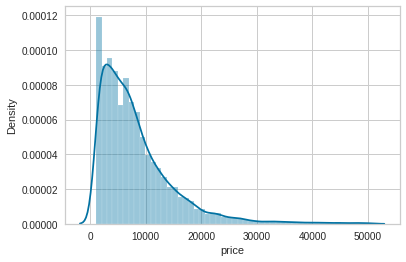

In [4]:
sns.distplot(df['price']);

##2 Replace NaN

In [5]:
df[df.isna().any(axis=1)]

,price,make,model,transmission,color,miles,year,fuel,engineCapacity,body,drivetrain,timeListed
10803,9300.0,Nissan,Leaf,automatic,blue,97400,2011,electric,NaN,hatchback,front,64
12960,12900.0,Nissan,Leaf,automatic,white,50000,2014,electric,NaN,hatchback,front,18
12969,12950.0,Chevrolet,Volt,automatic,silver,168000,2013,electric,NaN,liftback,front,6
13335,13850.0,Nissan,Leaf,automatic,white,57357,2015,electric,NaN,hatchback,front,75
13571,14500.0,Nissan,Leaf,automatic,black,84000,2014,electric,NaN,hatchback,front,138
13908,15500.0,Nissan,Leaf,automatic,black,84500,2013,electric,NaN,hatchback,front,58
15263,24750.0,BMW,i3,automatic,white,54150,2015,electric,NaN,hatchback,rear,18


Since the only Nan values in this table are for engine capacity, a metric that was found to have a mild correlation to price, these NaN values will be replaced with the median value so as to limit their impact




In [6]:
df['engineCapacity'] = df['engineCapacity'].fillna(df['engineCapacity'].median())

##3 Drop Columns

For this dataset, I already went through and removed columns that I did not know the meaning of. Also, this dataset was already very clean to begin with and therefore has no columns that need to be removed. 

In [7]:
df.dtypes

price             float64
make               object
model              object
transmission       object
color              object
miles               int64
year                int64
fuel               object
engineCapacity    float64
body               object
drivetrain         object
timeListed          int64
dtype: object

##5 Aggregation Functions



This is done before label encoding becasue many of the valuable columns are dropped for one-hot encoding.

I believe that make, model, and year average will be very helpful to the model during training. 

A fourth agg function is added to help the model further.  

In [8]:
df['makeAvg'] = df.groupby('make')['price'].transform('mean')

In [9]:
df['modelAvg'] = df.groupby('model')['price'].transform('mean')

In [10]:
df['yearAvg'] = df.groupby('year')['price'].transform('mean')

In [11]:
df['makeStDev'] = df.groupby('make')['price'].transform('std')

In [12]:
df

,price,make,model,transmission,color,miles,year,fuel,engineCapacity,body,drivetrain,timeListed,makeAvg,modelAvg,yearAvg,makeStDev
0,1100.0,Ford,Sierra,mechanical,red,333333,1992,gasoline,2.0,sedan,rear,16,6501.324202,1648.333333,2389.530383,5057.346807
1,1100.0,Ford,Mondeo,mechanical,red,250000,1993,gasoline,1.8,universal,front,23,6501.324202,4552.080588,2409.735348,5057.346807
2,1100.0,Ford,Mondeo,mechanical,red,567834,1996,diesel,1.8,sedan,front,80,6501.324202,4552.080588,3009.232247,5057.346807
3,1100.0,Ford,Mondeo,mechanical,red,555555,1996,diesel,1.8,universal,front,138,6501.324202,4552.080588,3009.232247,5057.346807
4,1100.0,Ford,Mondeo,mechanical,red,350000,1997,gasoline,1.6,universal,front,187,6501.324202,4552.080588,3076.851139,5057.346807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15740,49900.0,Mercedes-Benz,CLS63 AMG,automatic,grey,64338,2016,gasoline,5.5,sedan,all,68,10274.631946,49900.000000,17468.375496,8956.583686
15741,49900.0,BMW,X6,automatic,red,50000,2015,diesel,3.0,suv,all,25,10119.667477,24994.320952,17914.793793,8510.040803
15742,49950.0,Mercedes-Benz,S500,automatic,black,125000,2014,gasoline,4.7,sedan,all,144,10274.631946,10464.833333,16674.026996,8956.583686
15743,49999.0,Mercedes-Benz,GL63,automatic,white,100500,2013,gasoline,5.5,suv,all,257,10274.631946,48499.500000,15100.551175,8956.583686


##4 String Conversions

Transmision type will be label encoded as there are only two possible values. 

All other string values will be one-hot encoded. This will lead to a very large number of columns but I believe that this will lead to the most accurate model as there are no continuous string values in the dataset. 

In [13]:
y0 = pd.get_dummies(df.make, prefix='make')
y0.head()

,make_Audi,make_BMW,make_Chevrolet,make_Chrysler,make_Dodge,make_Ford,make_Honda,make_Kia,make_Mazda,make_Mercedes-Benz,make_Nissan,make_Toyota,make_Volkswagen
0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0


In [14]:
df = pd.concat([df, y0], axis=1).drop(['make'], axis=1)

In [15]:
y1 = pd.get_dummies(df.model, prefix='model')
y1.head()

,model_100,model_100NX,model_116,model_118,model_120,model_1500,model_190,model_2,model_200,model_200SX,...,model_X5 M,model_X6,model_X6 M,model_Xedos 6,model_Xedos 9,model_Yaris,model_Z3,model_Z4,model_i3,model_М5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = pd.concat([df, y1], axis=1).drop(['model'], axis=1)

In [17]:
df['transmission'] = df['transmission'].astype('category').cat.codes

In [18]:
y2 = pd.get_dummies(df.color, prefix='color')
y2.head()

,color_black,color_blue,color_grey,color_red,color_silver,color_white
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [19]:
df = pd.concat([df, y2], axis=1).drop(['color'], axis=1)

In [20]:
y3 = pd.get_dummies(df.fuel, prefix='fuel')
y3.head()

,fuel_diesel,fuel_electric,fuel_gasoline
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [21]:
df = pd.concat([df, y3], axis=1).drop(['fuel'], axis=1)

In [22]:
y4 = pd.get_dummies(df.body, prefix='body')
y4.head()

,body_cabriolet,body_coupe,body_hatchback,body_liftback,body_limousine,body_minibus,body_minivan,body_pickup,body_sedan,body_suv,body_universal,body_van
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
df = pd.concat([df, y4], axis=1).drop(['body'], axis=1)

In [24]:
y5 = pd.get_dummies(df.drivetrain, prefix='drivetrain')
y5.head()

,drivetrain_all,drivetrain_front,drivetrain_rear
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [25]:
df = pd.concat([df, y5], axis=1).drop(['drivetrain'], axis=1)

##6 Summary of 2, 3, and 4

Since the only Nan values in this table are for engine capacity, a metric that was found to have a mild correlation to price, these NaN values will be replaced with the median value so as to limit their impact

The data was preprocessed in excel so there were no columns that needed to be dropped

Transmision type will be label encoded as there are only two possible values. 

All other string values will be one-hot encoded. This will lead to a very large number of columns but I believe that this will lead to the most accurate model as there are no continuous string values in the dataset. 

##9 Normalization

For this dataset there are two columns that it makes sense to normalize. They are miles and time listed. 

In [26]:
column = 'miles'
df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
  
column = 'timeListed'
df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())  

df.head()

,price,transmission,miles,year,engineCapacity,timeListed,makeAvg,modelAvg,yearAvg,makeStDev,...,body_minibus,body_minivan,body_pickup,body_sedan,body_suv,body_universal,body_van,drivetrain_all,drivetrain_front,drivetrain_rear
0,1100.0,1,0.333333,1992,2.0,0.007168,6501.324202,1648.333333,2389.530383,5057.346807,...,0,0,0,1,0,0,0,0,0,1
1,1100.0,1,0.250000,1993,1.8,0.010305,6501.324202,4552.080588,2409.735348,5057.346807,...,0,0,0,0,0,1,0,0,1,0
2,1100.0,1,0.567834,1996,1.8,0.035842,6501.324202,4552.080588,3009.232247,5057.346807,...,0,0,0,1,0,0,0,0,1,0
3,1100.0,1,0.555555,1996,1.8,0.061828,6501.324202,4552.080588,3009.232247,5057.346807,...,0,0,0,0,0,1,0,0,1,0
4,1100.0,1,0.350000,1997,1.6,0.083781,6501.324202,4552.080588,3076.851139,5057.346807,...,0,0,0,0,0,1,0,0,1,0


##7&9 Data Splitting 

In [99]:
x_cols = df.columns[1:]

X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.1, random_state=42)

#Part2: Training

##Linear Regression

In [100]:
linReg = LinearRegression().fit(X_train, y_train)
LinScore = linReg.score(X_train, y_train)

In [101]:
predictionsLin = linReg.predict(X_test)

##SGD Regression

In [102]:
logReg = make_pipeline(MinMaxScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
logReg.fit(X_train, y_train)
LogScore = logReg.score(X_test, y_test)

In [103]:
predictionsLog = logReg.predict(X_test)

#Part3: Model Analysis

##Model Accuracies

In [105]:
print("LinearRegression: ", round(LinScore * 100, 4), "\nSGD Regression:   ", round(LogScore * 100, 4))

LinearRegression:  86.8568 
SGD Regression:    84.1906


##3 Training-Test Splits

###Linear Regression

In [34]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.20, random_state=0)
linReg0 = LinearRegression().fit(X_train, y_train)
score0Lin = linReg0.score(X_test, y_test)

In [35]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.35, random_state=1)
linReg1 = LinearRegression().fit(X_train, y_train)
score1Lin = linReg1.score(X_test, y_test)

In [36]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.50, random_state=0)
linReg2 = LinearRegression().fit(X_train, y_train)
score2Lin = linReg2.score(X_test, y_test)

In [37]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.65, random_state=2)
linReg3 = LinearRegression().fit(X_train, y_train)
score3Lin = linReg3.score(X_test, y_test)

In [38]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.80, random_state=2)
linReg4 = LinearRegression().fit(X_train, y_train)
score4Lin = linReg4.score(X_test, y_test)

In [39]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.95, random_state=2)
linReg5 = LinearRegression().fit(X_train, y_train)
score5Lin = linReg5.score(X_test, y_test)

### SGD Regression

In [40]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.2, random_state=0)
logReg0 = make_pipeline(MinMaxScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
logReg0.fit(X_train, y_train)
score0Log =logReg0.score(X_test, y_test)

In [41]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.35, random_state=0)
logReg1 = make_pipeline(MinMaxScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
logReg1.fit(X_train, y_train)
score1Log =logReg1.score(X_test, y_test)

In [42]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.50, random_state=0)
logReg2 = make_pipeline(MinMaxScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
logReg2.fit(X_train, y_train)
score2Log =logReg2.score(X_test, y_test)

In [43]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.65, random_state=0)
logReg3 = make_pipeline(MinMaxScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
logReg3.fit(X_train, y_train)
score3Log =logReg3.score(X_test, y_test)

In [44]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.80, random_state=0)
logReg4 = make_pipeline(MinMaxScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
logReg4.fit(X_train, y_train)
score4Log =logReg4.score(X_test, y_test)

In [45]:
x_cols = df.columns[1:]
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['price'], test_size=0.95, random_state=2)
logReg5 = make_pipeline(MinMaxScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
logReg5.fit(X_train, y_train)
score5Log =logReg5.score(X_test, y_test)

##4. Residuals Plot

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


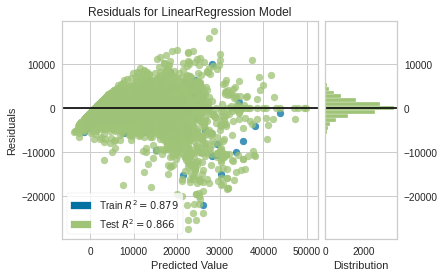

In [46]:
visual = ResidualsPlot(linReg)
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
visual.poof()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


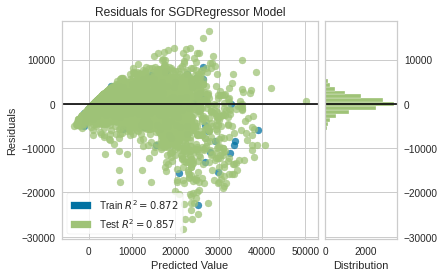

In [47]:
visual = ResidualsPlot(logReg)
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
visual.poof()

##Model Comparisons 

In [95]:
testSize = [10, 20, 35, 50, 65, 80, 95]

In [107]:
scoresLin = [LinScore, score0Lin, score1Lin, score2Lin, score3Lin, score4Lin, score5Lin]
for s in range(len(scoresLin)):
  print("Accuracy for Test Size:",testSize[s], ":", round(scoresLin[s] * 100, 4))

Accuracy for Test Size: 10 : 86.8568
Accuracy for Test Size: 20 : 84.7785
Accuracy for Test Size: 35 : 84.5205
Accuracy for Test Size: 50 : 84.8112
Accuracy for Test Size: 65 : 83.657
Accuracy for Test Size: 80 : 83.3336
Accuracy for Test Size: 95 : 78.6692


In [108]:
scoresLog = [LogScore, score0Log, score1Log, score2Log, score3Log, score4Log, score5Log]
for s in range(len(scoresLog)):
  print("Accuracy for Test Size:",testSize[s], ":", round(scoresLog[s]*100, 4))

Accuracy for Test Size: 10 : 84.1906
Accuracy for Test Size: 20 : 85.1506
Accuracy for Test Size: 35 : 84.4041
Accuracy for Test Size: 50 : 84.3622
Accuracy for Test Size: 65 : 83.5554
Accuracy for Test Size: 80 : 83.072
Accuracy for Test Size: 95 : 80.8419


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


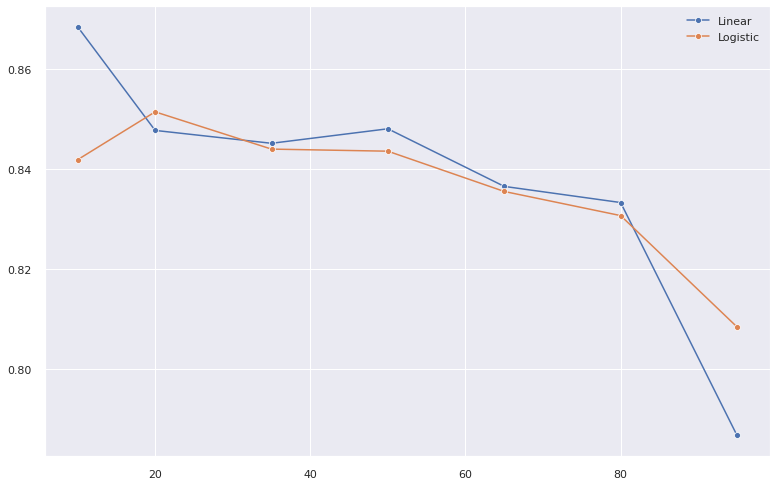

In [109]:
fig, ax = plt.subplots()
sns.lineplot(testSize, scoresLin, marker='o', ax=ax, label='Linear')
sns.lineplot(testSize, scoresLog, marker='o', ax=ax, label='Logistic')

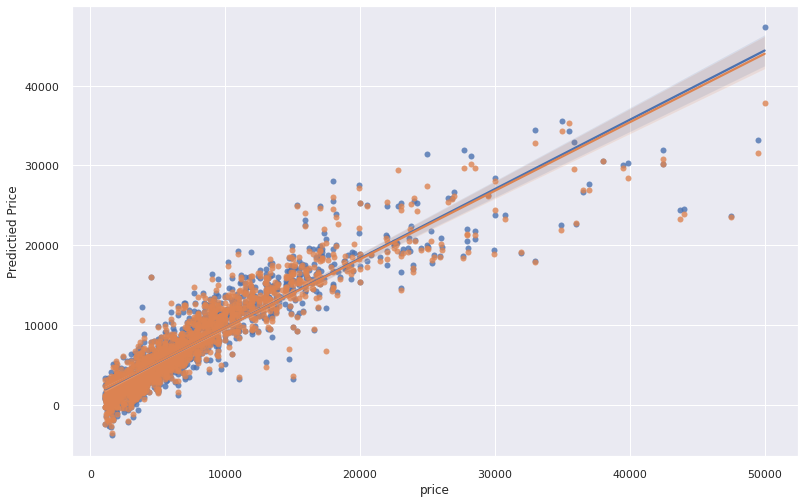

In [116]:
fig, ax = plt.subplots()
ax.set_ylabel("Predictied Price")
sns.regplot(x=y_test, y=predictionsLin, ax=ax)
sns.regplot(x=y_test, y=predictionsLog, ax=ax)